# Bayesian Blocks

#### author : 

#### created :

#### Table Of Contents
1. [Introduction](#1.-Introduction:)

2. [Objective](#2.-Objective:)

3. [Method](#3.-Method:)



### 1. Introduction:
Bayesian Blocks is a time-domain algorithm for detecting localized structures (bursts), revealing pulse shapes, and generally characterizing intensity variations. The input is raw counting data, in any of three forms: time-tagged events(TTE), binned counts, or time-to-spill data. The output is the most probable segmentation of the observation into time intervals during which the amplitude is perceptibly constant, i.e. has no statistically significant variations. The idea is not that the times series of events is deemed to have this discontinuous, piecewise constant form, rather that such an approximate and generic model is often useful. The analysis is based on Bayesian statistics.


### 2. Objective:

The method was first used to address the problem of detecting and characterizing local variability in time series and other forms of sequential data in astronomical data. The main objective of this method is to design a histogram that fits to the data well in a way that it distinguishes between observational errors and statistical significance. 

## 3. Method:

______________________________________________________________________________________________






### 3.1. Blockwise Model :

The range of independent variables(e.g., time) are divided into subintervals(called blocks) which are normally unequal in size. The dependent variables(e.g., intensity) are usually constant within errors in a single block. In more complicated models one might use linear or exponential functions to show the dependency of the variables within blocks, in this paper, however, it is not needed to increase the complexity when the data is well-presented with the constant model. 

Defining the times ending one block and starting the next as change points, the model of the whole observation interval contains these parameters:


$1. N_{cp}:$ The number of change points. 


$2. t_{k}^{cp}:$ The change-point starting block K (and ending block (k-1))

$3. X_{k}:$ The signal amplitude in block K.


$ K = 1, 2, 3, ....., N_{cp} + 1$


* it is important to mention that the first datum is always considered the first change-point; therefore, it is not a free parameter.


In [9]:
install.packages("svMisc")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
#libraries
library(svMisc)
library('lubridate')
library(dplyr)
library(lubridate)

In [2]:
#Juilia's data:
#producing some fake data to see the result for it:
data = c(rnorm(1000, mean = 0), rcauchy(1000, 5))
data = data[data> -5 & data<10]

typeof(data)

[1] "double"

In [4]:
#George's data

data <- read.table("./spectrum.dat")
data = data$V1

In [3]:
#defining the fitness function:
logf <- function(N_k, T_k){
    return(N_k * log(N_k/T_k))
}

In [4]:
#The fitness function = Cash#

BB <- function(x) {
    
    #for atomic data vectors(1D):
    if (class(x) == 'numeric') {
        x_sorted = sort(x)
        x_unique <- c(x_sorted[1])
        x_weight <- c(1)
        for(i in 2:length(x_sorted)) {
            #adding weight if it is repeated:
            if(x_sorted[i] == x_sorted[i-1]) {
            x_weight[length(x_weight)] <- x_weight[length(x_weight)] + 1
            }
            else {
            x_unique <- c(x_unique, x_sorted[i])
            x_weight <- c(x_weight, 1)
            }
        }    
    }#---------------------------------------------------------- 
           
    #For histogram data:        
    else if (class(x) == 'histogram') {
        eg <- data$breaks
        x_unique <- c(eg[1],data$mids,eg[length(eg)])
        x_weight <- c(1,data$counts,1)
    }        
    else {
        stop('The data type is not supported! Please input numeric vectors or histograms')
        
    }#------------------------------------------------------------ 
    
                
     #Final number of data points:       
    N = length(x_unique) 
    
    

    
    

    
    #defining a prior dis function:
    logp <- function(prior) {
        if(prior == 'uniform') {
            return(0)
        }
        else if(prior == 'gamma') {
            #gamma = as.numeric(readline('input the parameter gamma: '))
            gamma = 0.01
            return(-log(gamma))
        }
        else if(prior == 'p0') {
            #p0 = as.numeric(readline('input the parameter p0: '))
            p0 = 0.01
            return( log(73.53 * p0 * N^(-0.478)) - 4)
            
        }
        else {
            stop('No Prior Distribution input!')
        }
        
    }
        
    x <- x_unique
    
    #input one of these:
    #1.uniform           2.gamma              3.p0
    prior_input = readline('Please input the type of prior distribution: ')
        
    #calculating the prior:
    ncp_prior = logp(prior = prior_input)
         
        
    #array of all possible edges:
    edges <- c(x[1], 0.5*(x[1:(length(x)-1)] + x[2:length(x)]), x[length(x)])
    
   
    best = c()
    last = c()
        
        
    F <- function(r, k){
    return(logf(sum(x_weight[r:k]), edges[k+1] - edges[r]) + ncp_prior)
    } 
        
    for (k in 1:N){
    A <- c()
    for (r in 1:k){
        A <- c(A, F(r, k)+ if(r==1) 0 else best[r-1])
    }
    last <- c(last, which.max(A))
    best <- c(best, max(A, na.rm=TRUE))
    progress(k, N, progress.bar=TRUE)
    if (k == N) message("Done!")
    }
    
               
    
               
    cp <- c()
    i <- N + 1
    while(i!=0){
        cp <- c(cp, i)
        i = (if(i == 1) 0 else last[i - 1])
    }

    y <- c()
    for (j in cp[length(cp):-1:1]){
        y <- c(y, edges[j])
    }
    return(y)
   
    
}

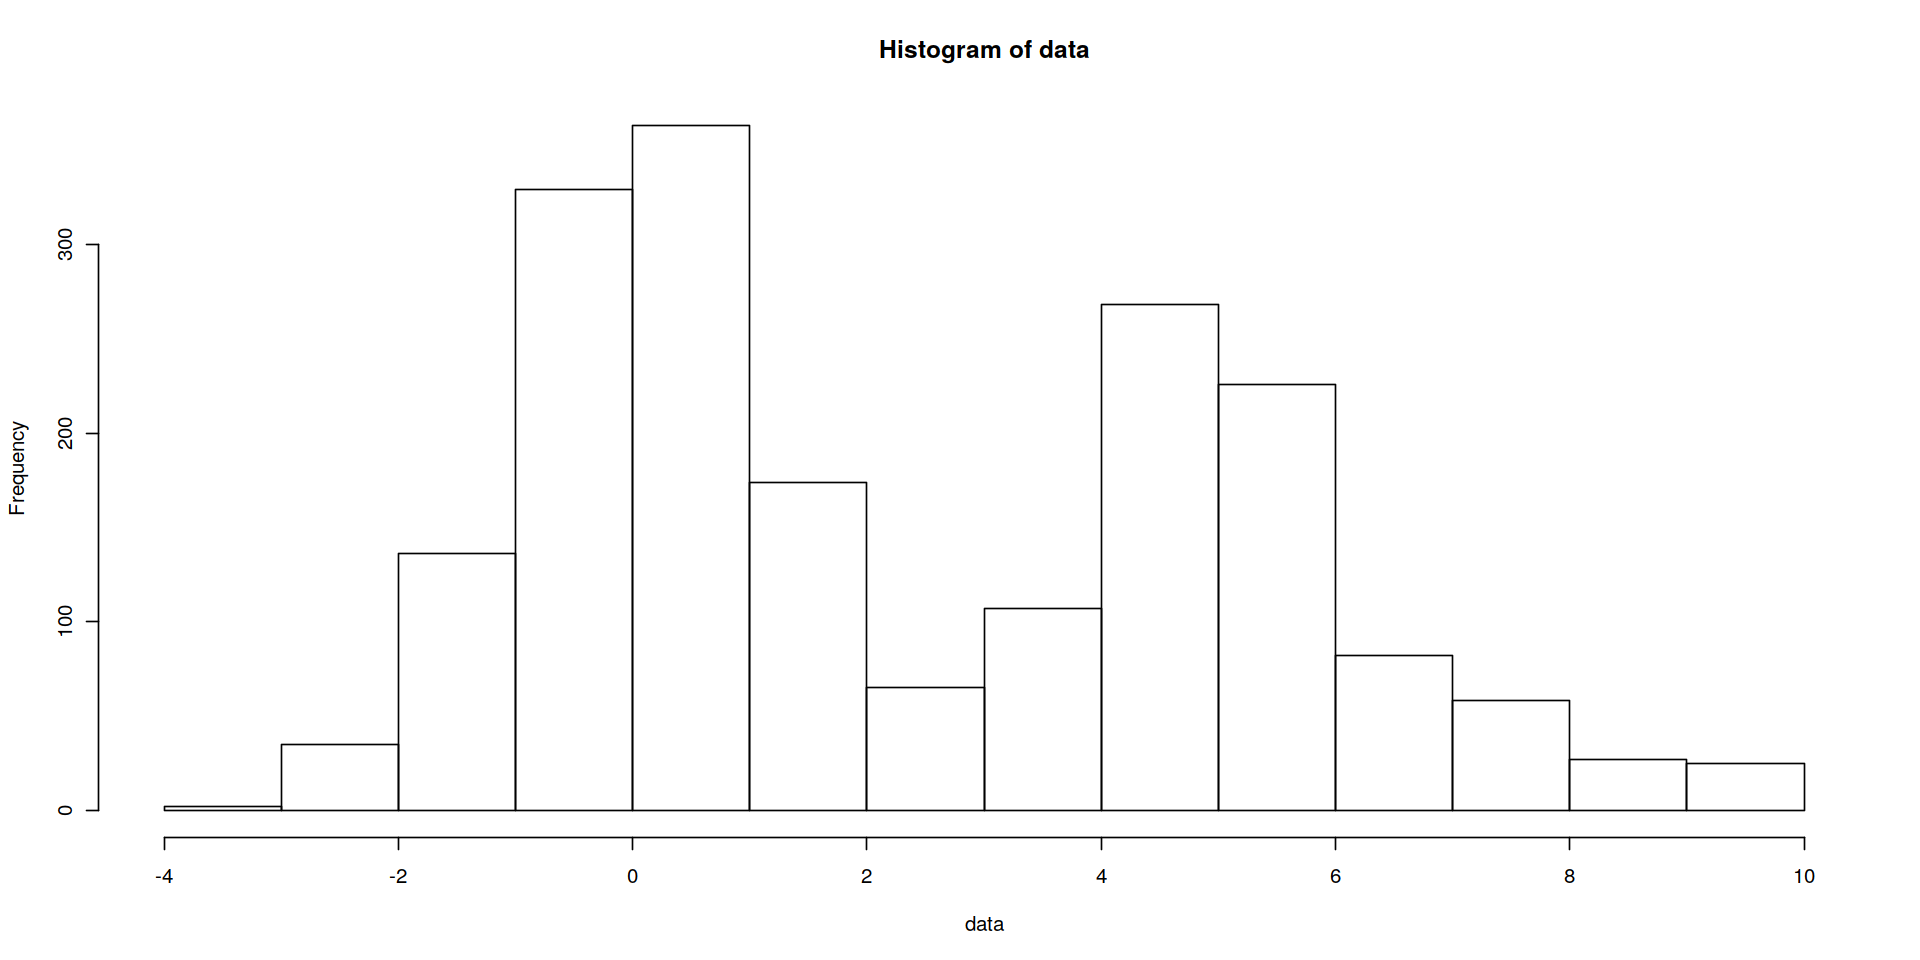

In [56]:
hist(data)

In [ ]:
breaks = BB(data)

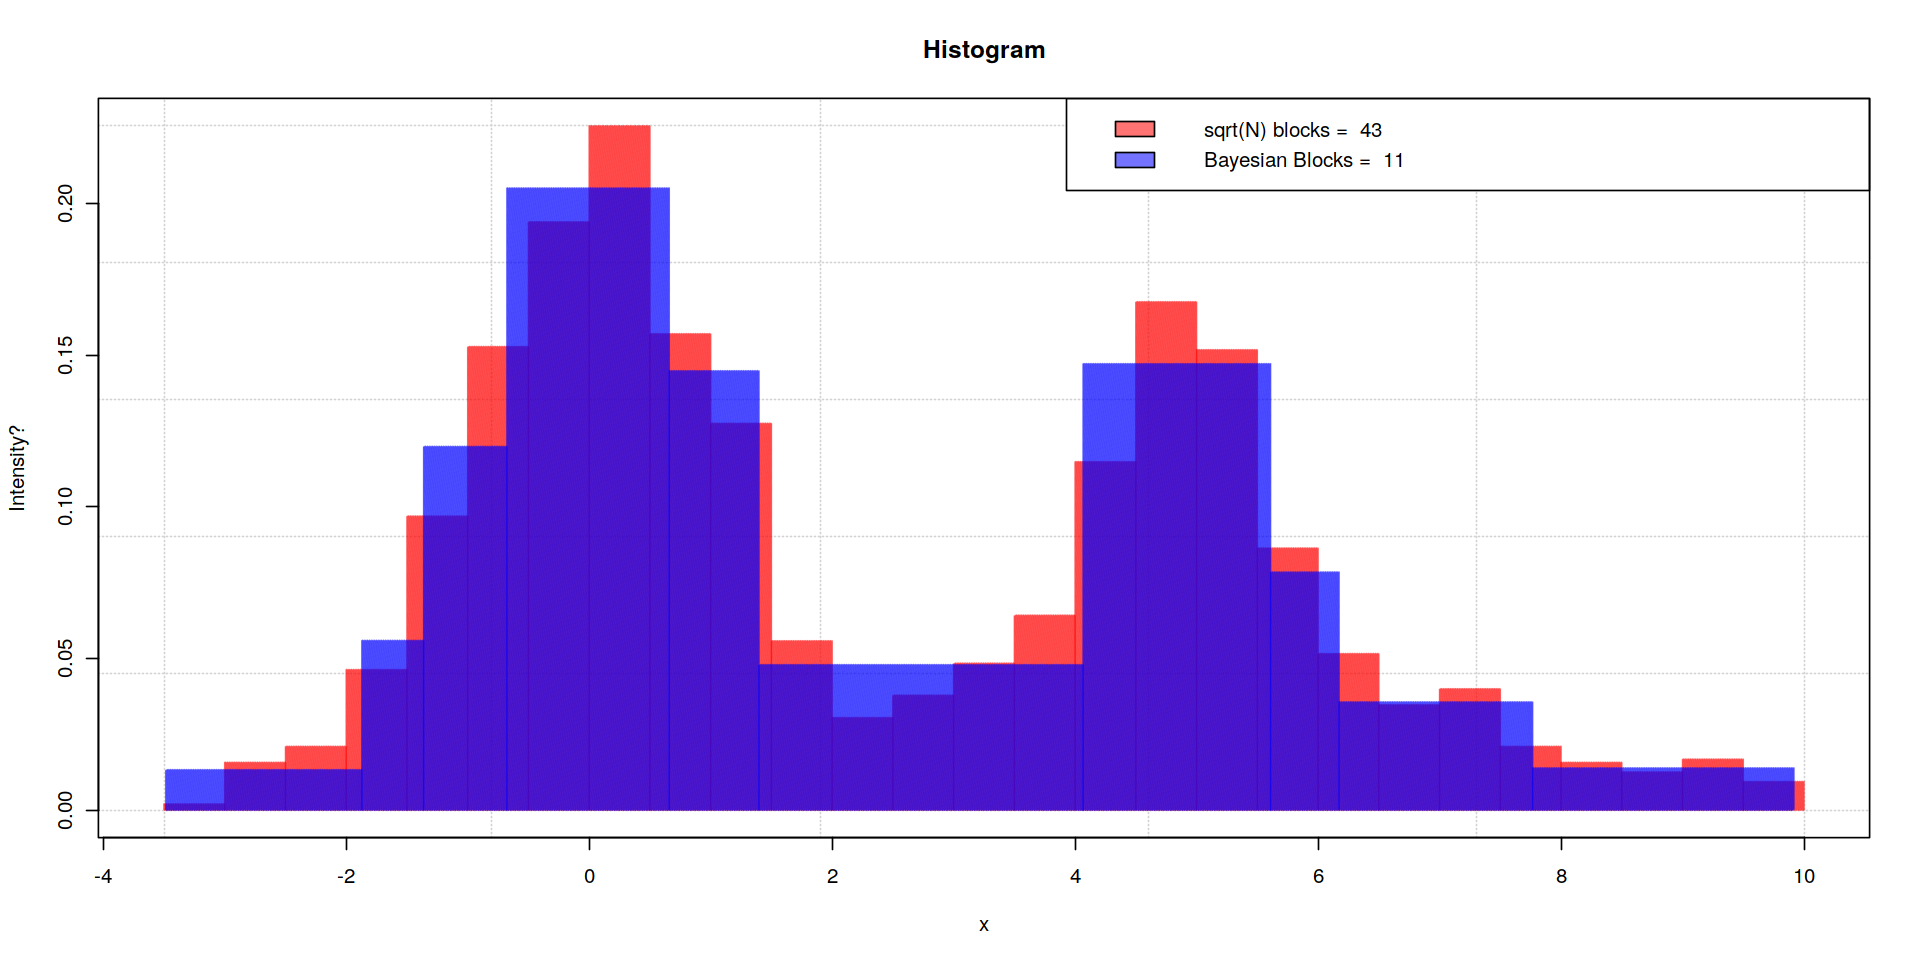

In [55]:
N <- length(data)

col1 = scales::alpha(2,.55)
col2 = scales::alpha(4,.55)

# sqrt(N)
hist(data,breaks=sqrt(N),freq=FALSE,col=col1,border=F, panel.first=grid(),density=200,
     xlab='x',ylab='Intensity?',main=('Histogram'))
# Bayesian Blocks
hist(data,breaks=breaks,density=200, col=col2,border=F,add=T)

text_legend <- c(sprintf("sqrt(N) blocks = %3i",floor(sqrt(N))), sprintf("Bayesian Blocks = %3i",length(breaks)))

legend("topright", 
       legend=text_legend,
       fill=c(col1, col2),
       text.width = strwidth(text_legend)[2]/2)
box()


__________________________________________________________________________

# Bayesian Blocks In Stock Market:



## Stock market index:

a single Index in stock market measures the performance of a collection of stocks. One can easily measure the preformace of a single stock by looking at the performance of an index. The main idea of Indexes is to have a larger picture of performance of market and not focusing too much on a single stock.

## S&P 500 index:


The S&P 500 index measures the performance of 500 of the largest publicly traded companies in the U.S. Due to its broader exposure, Experts believe that S&P 500 index is the best index for tracking fluctuations in the US stock market. This index is weighted by market cap, which is the **number** of a **company's outstanding shares** multiplied by **price per share**. Therefore, the companies with the largest total market value have the greatest impact on the average of the S&P 500 index.



The most problematic part of studying stock market is anticipating the health of market in general. The main reason of this problem is that the stock prices follow the brownian motion which is a quite random process in a scence that the next step of the stock price is only dependent on the current price of the stock and not on the previous prices.

$$\large\frac{ds}{s} = \mu dt + \sigma dz $$

s: price of the stock.

$\mu$: drift rate.

$\sigma$: fluctuaions (volatility).






## studying history of market is useful:

However, experts believe that modeling and measuring the previous fluctuation of the indexes and stock prices themselves is beneficial due to the fact that it demonstrate some facts about the overall behaviour of the market.


one of the most catastrophic crashes that the market has ever experienced was in Covid 19 pandamic. There are a lot to scrutinize about the performance of a single company with respect to the S&P 500 index and search for the companies for the most impact of the dramatic decrease in the index.

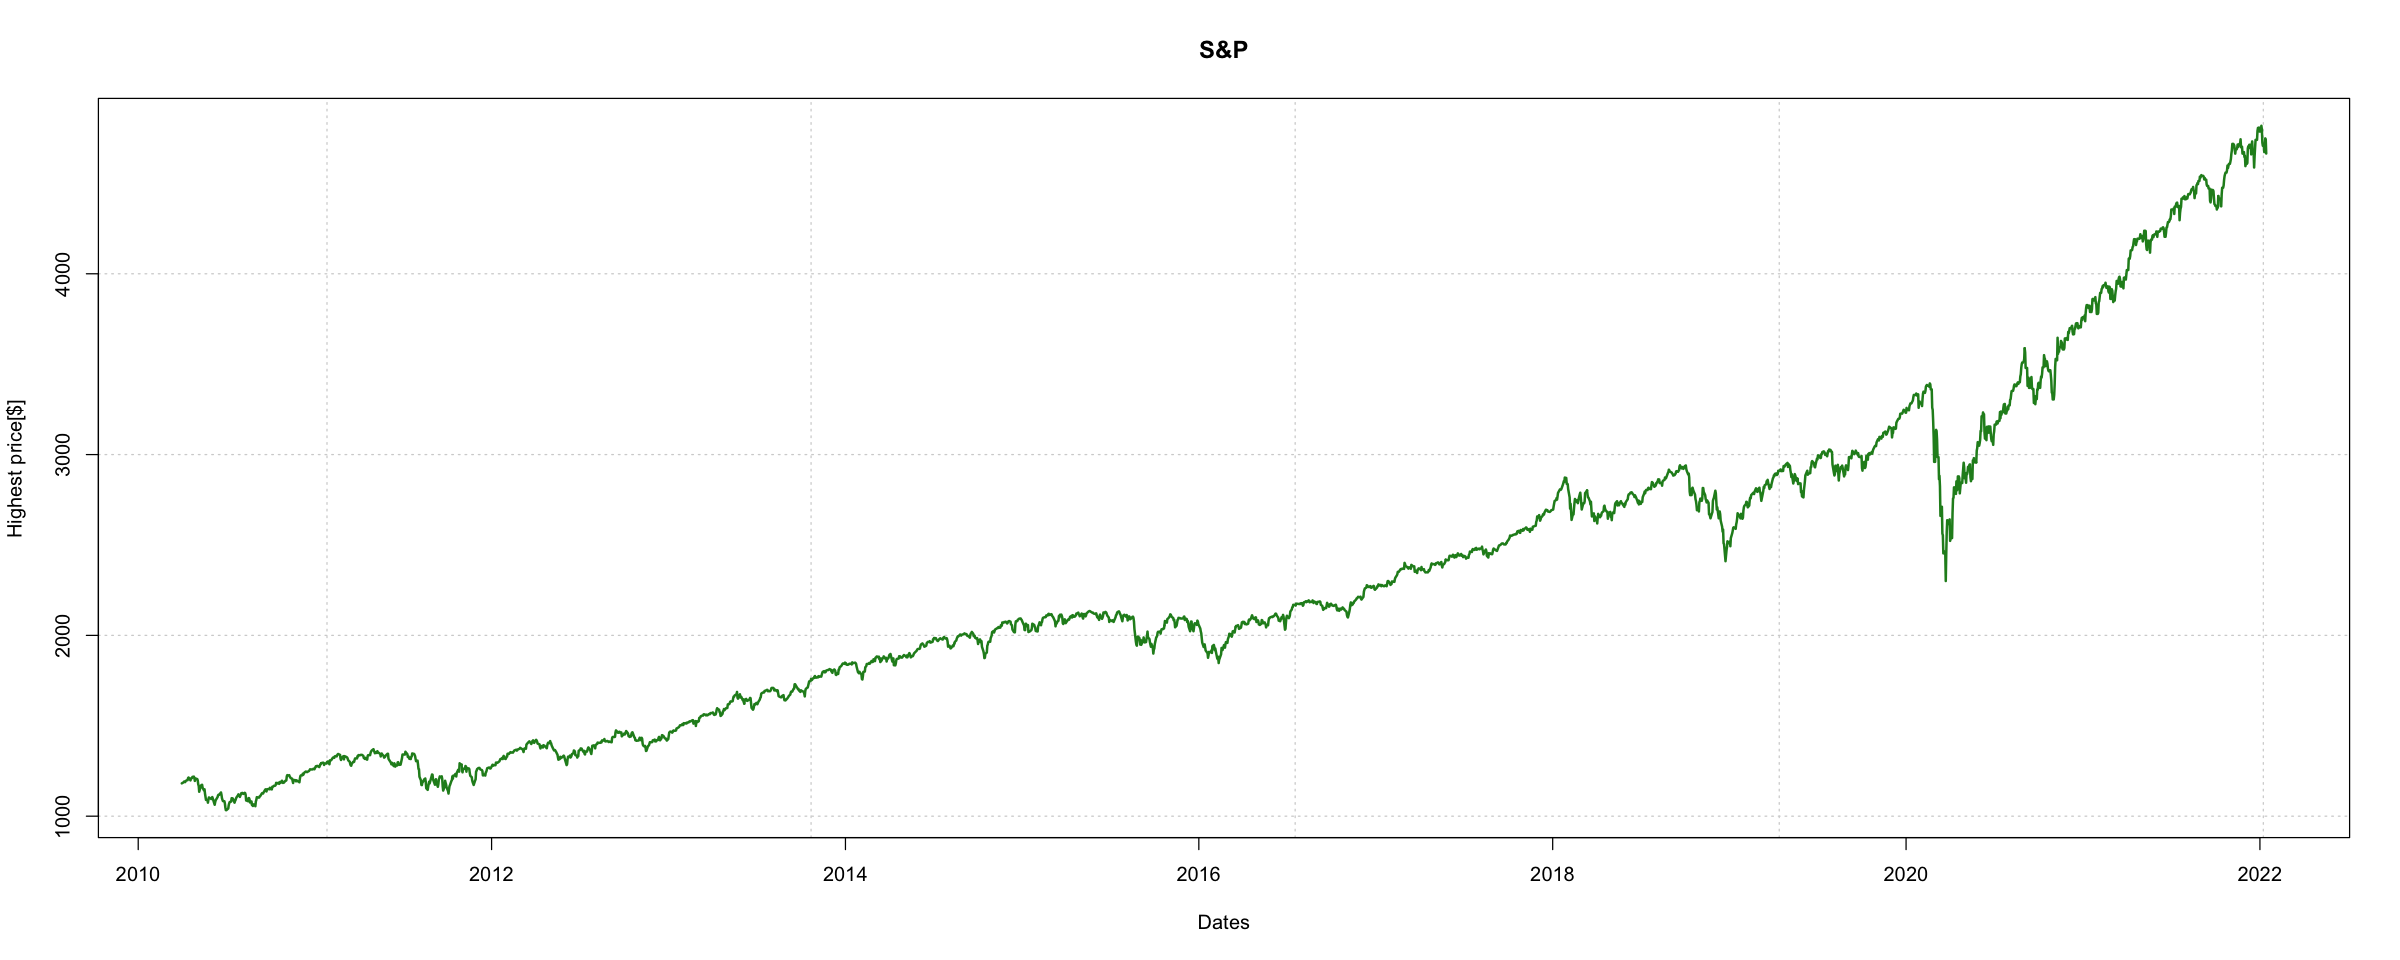

In [15]:
#Stock market




SP = read.csv('/Users/melikakeshavarz/Desktop/adv/SPX_HistoricalData.csv')



Date = as.character(SP$Date)

#year/month/day
SP$Date = mdy(Date)
Date = SP$Date

#checking the years:
#year(Date)

#plotting 
par(mfrow=c(1,1))
options(repr.plot.width=20, repr.plot.height=8)


plot(Date, SP$High, type = 'l', col = 'forestgreen', xlab = 'Dates', ylab = 'Highest price[$]', main = 'S&P', panel.first = grid(), lwd = 2)



In [ ]:
#filtering the data from Covid 19 economic crisis:
#----------------------------------------------------------------------------------------------------------------------
SP %>% filter(between(Date, as.Date('2020-01-01'), as.Date('2022-01-01'))) -> SP


#checking the years:
#year(SP$Date)




#######How to make it a historam?
#approximation in oder to get round data:
SP$High<-as.integer(SP$High)

######The matrix of date destribution w.r.t Highest price:
MatData <- matrix(0,nrow=sum(SP$High),ncol=1)

k <- 1


for(i in 1:dim(SP)[1]){
  L <- SP$High[i]
  if(L!=0){
    MatData[k:(k+L-1)] <- rep(SP$Date[i],L)
    k <- k + L
  }
  else{
    pass
  }
}

#omitting zero values:
MatData[MatData==0] <- NA
na.omit(MatData)
#head(MatData, 20)

#Checking%
MatData<-sort(MatData)

#Converting number of days to dates:
MData = as.Date(MatData, origin = '1970-01-01')
#head(MData, 20)









Please input the type of prior distribution: p0


Done!
Warning message in length(cp):-1:1:
“numerical expression has 33 elements: only the first used”

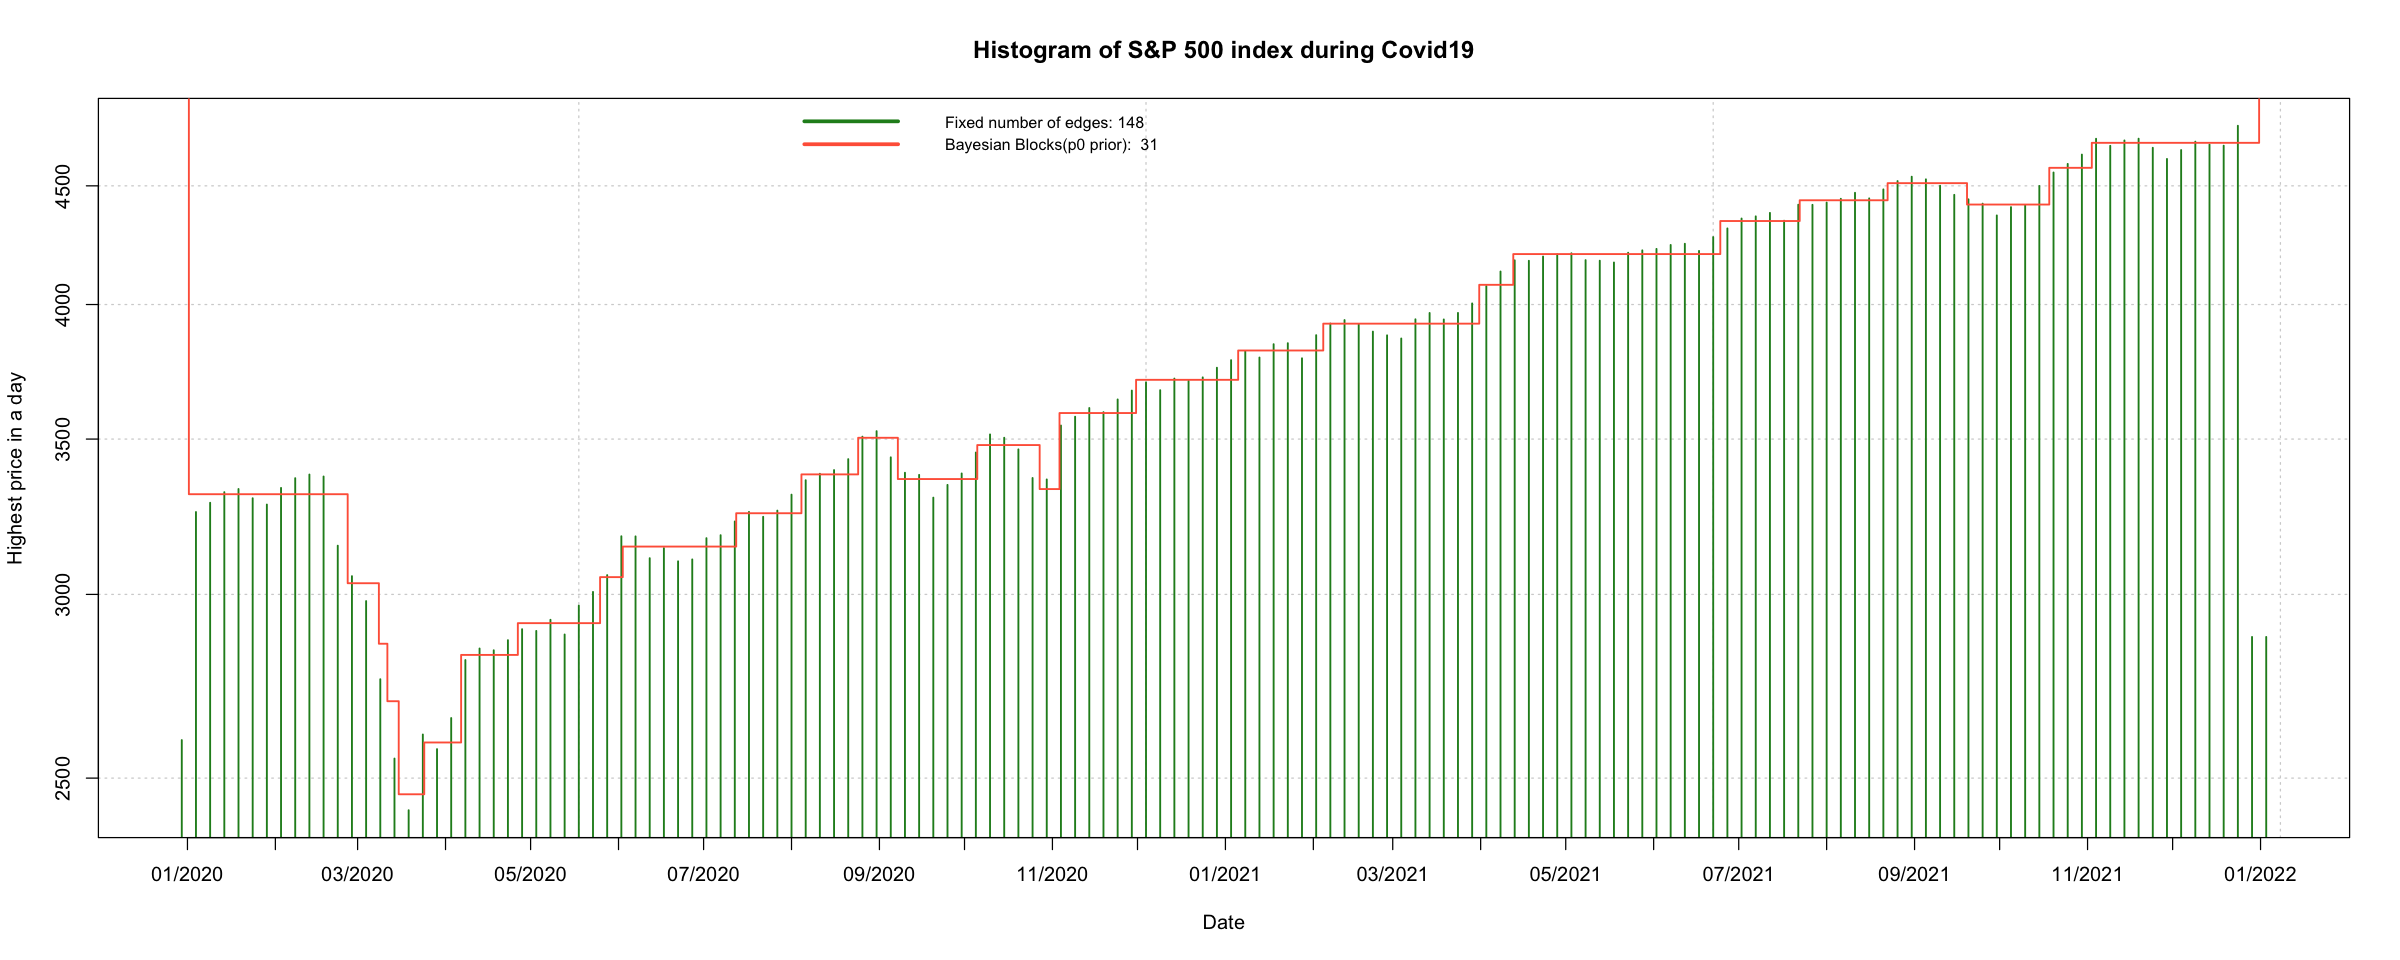

In [11]:
#applying the Bayesin Blocks to the stock market data:

#PIROR = P0
#-------------------------------------------------------------------------------

BB_breaks <- BB(MatData)


myhist <- hist(MData, breaks= 260, plot = F) #The hist with equal bins.
BBhist <- hist(MatData , breaks= BB_breaks, plot= F)#The Bayesian bins.


# S&P highest price during Covid19:
par(mfrow=c(1,1))
options(repr.plot.width=20, repr.plot.height=8)

#with equal breaks:
plot(x=myhist$breaks[1:length(myhist$breaks)],log = 'y', y= length(MatData) *c(myhist$density,tail(myhist$density,n=1)), panel.first=grid(),
     col='forestgreen',lwd=1.5, type='h', xlab='Date',ylab='Highest price in a day',
     main="Histogram of S&P 500 index during Covid19", xaxt = "n" )
# Bayesian Blocks plot:
lines(x=BBhist$breaks[1:length(BBhist$breaks)], y= length(MatData) * c(BBhist$density,tail(BBhist$density,n=1)), type='s', lwd=1.5,col='tomato')
axis.Date(1, at=seq(min(SP$Date), max(SP$Date), by="1 mon"), format="%m/%Y")
legend("top", inset=+0,legend=c(sprintf("Fixed number of edges: %3i",length(myhist$breaks)),sprintf("Bayesian Blocks(p0 prior): %3i",length(BBhist$breaks))),
       col=c("forestgreen","tomato"),lty=c(1,1), lwd=c(3, 3), cex=0.8,box.lty=0, border=F)





Please input the type of prior distribution: uniform


Done!
Warning message in length(cp):-1:1:
“numerical expression has 574 elements: only the first used”

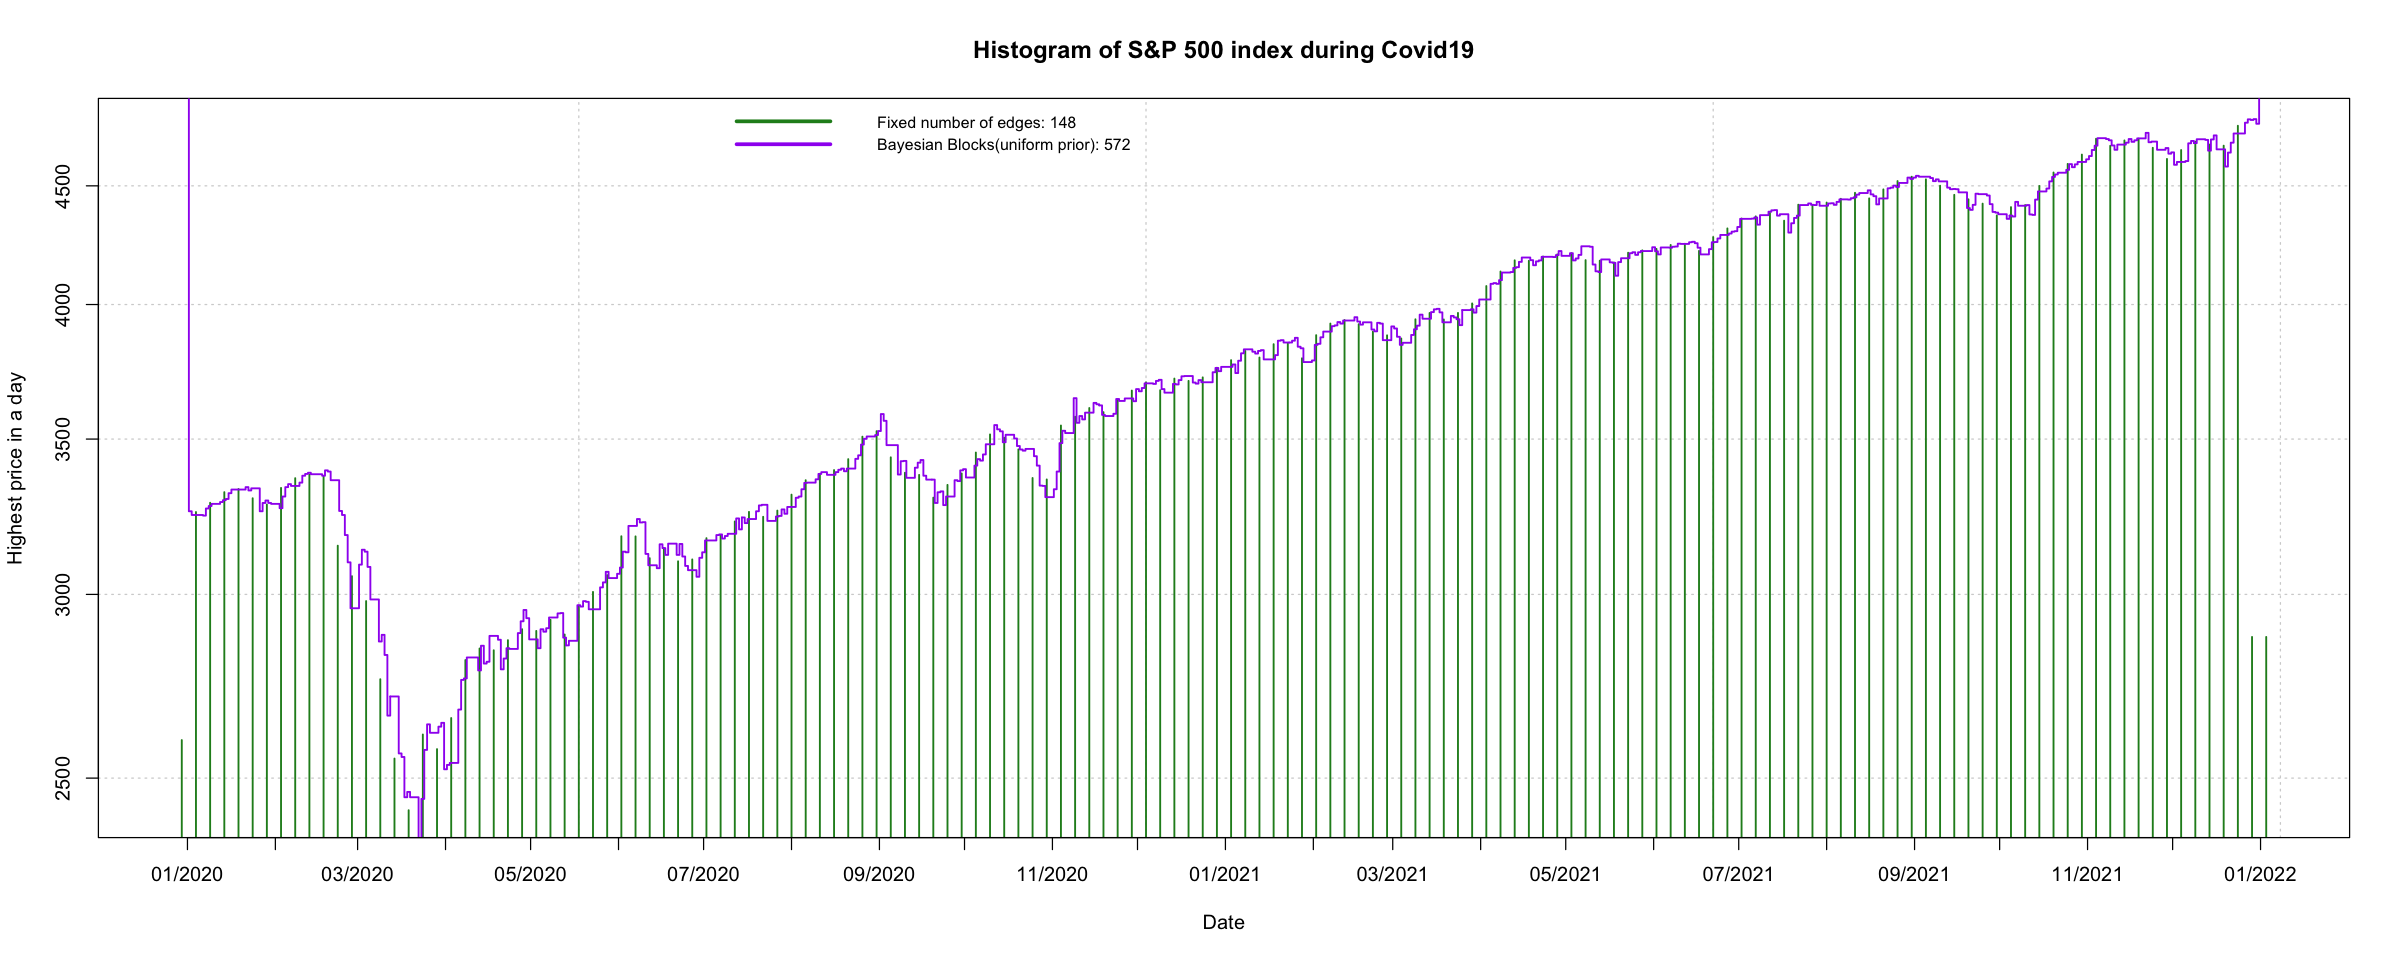

In [12]:
#PRIOR = Uniform
#-------------------------------------------------------------------------------

BB_breaks <- BB(MatData)


myhist <- hist(MData, breaks= 260, plot = F) #The hist with equal bins.
BBhist <- hist(MatData , breaks= BB_breaks, plot= F)#The Bayesian bins.


# S&P highest price during Covid19:
par(mfrow=c(1,1))
options(repr.plot.width=20, repr.plot.height=8)

#with equal breaks:
plot(x=myhist$breaks[1:length(myhist$breaks)],log = 'y', y= length(MatData) *c(myhist$density,tail(myhist$density,n=1)), panel.first=grid(),
     col='forestgreen',lwd=1.5, type='h', xlab='Date',ylab='Highest price in a day',
     main="Histogram of S&P 500 index during Covid19", xaxt = "n" )
# Bayesian Blocks plot:
lines(x=BBhist$breaks[1:length(BBhist$breaks)], y= length(MatData) * c(BBhist$density,tail(BBhist$density,n=1)), type='s', lwd=1.5,col='purple')
axis.Date(1, at=seq(min(SP$Date), max(SP$Date), by="1 mon"), format="%m/%Y")
legend("top", inset=+0,legend=c(sprintf("Fixed number of edges: %3i",length(myhist$breaks)),sprintf("Bayesian Blocks(uniform prior): %3i",length(BBhist$breaks))),
       col=c("forestgreen","purple"),lty=c(1,1), lwd=c(3, 3), cex=0.8,box.lty=0, border=F)



Please input the type of prior distribution: gamma


Done!
Warning message in length(cp):-1:1:
“numerical expression has 735 elements: only the first used”

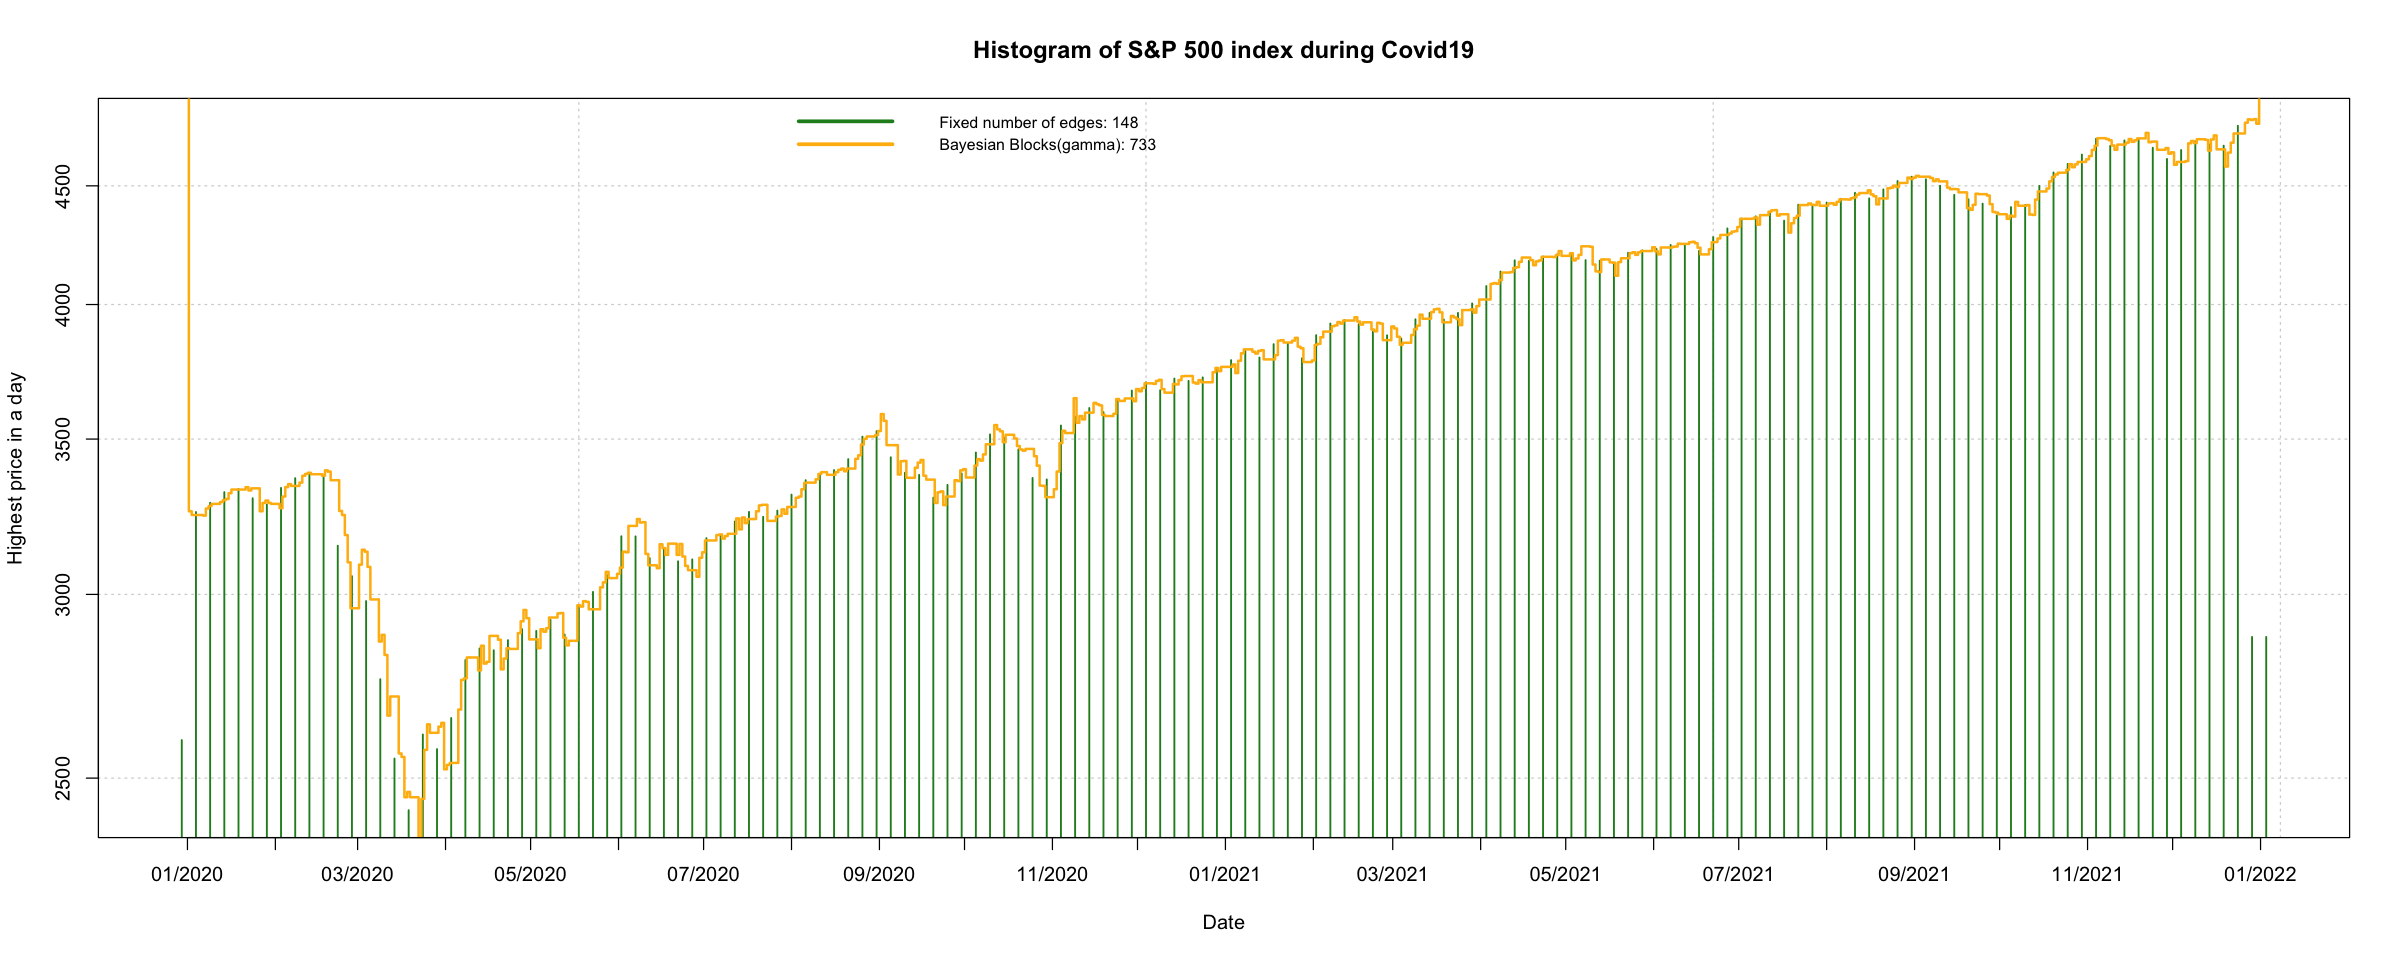

In [14]:
#PRIOR = gamma
#-------------------------------------------------------------------------------

BB_breaks <- BB(MatData)


myhist <- hist(MData, breaks= 260, plot = F) #The hist with equal bins.
BBhist <- hist(MatData , breaks= BB_breaks, plot= F)#The Bayesian bins.


# S&P highest price during Covid19:
par(mfrow=c(1,1))
options(repr.plot.width=20, repr.plot.height=8)

#with equal breaks:
plot(x=myhist$breaks[1:length(myhist$breaks)],log = 'y', y= length(MatData) *c(myhist$density,tail(myhist$density,n=1)), panel.first=grid(),
     col='forestgreen',lwd=1.5, type='h', xlab='Date',ylab='Highest price in a day',
     main="Histogram of S&P 500 index during Covid19", xaxt = "n" )
# Bayesian Blocks plot:
lines(x=BBhist$breaks[1:length(BBhist$breaks)], y= length(MatData) * c(BBhist$density,tail(BBhist$density,n=1)), type='s', lwd=2,col='darkgoldenrod1')
axis.Date(1, at=seq(min(SP$Date), max(SP$Date), by="1 mon"), format="%m/%Y")
legend("top", inset=+0,legend=c(sprintf("Fixed number of edges: %3i",length(myhist$breaks)),sprintf("Bayesian Blocks(gamma): %3i",length(BBhist$breaks))),
       col=c("forestgreen","darkgoldenrod1"),lty=c(1,1), lwd=c(3, 3), cex=0.8,box.lty=0, border=F)

